In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import random
import copy

import sys
sys.path.append("Fall 2024")

import kmax as kx
import utility as util
from hierarchy import *
import z_solver as zs

# Midterm Presentation

## MVDP with edge weights

In [2]:
label_font_size = 8

In [3]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

def custom_draw(graph, layout,
                draw_edge_weights=True, draw_path=True,
                path_subset=None, label_subset=None,
                x_nudge=0.05, y_nudge=0.05):
    # draw specified node labels (z-values)
    tuples = dict(util.path_cover(tree, root=0, return_tuples=True))
    label_dict = {node: '%.2f'%(tuples[node][1]) for node in
                  (label_subset if label_subset is not None else graph.nodes())}
    
    nx.draw_networkx(graph, pos=layout, 
                     labels=label_dict, with_labels=True,
                     arrows=True, node_size=450, font_color='w', font_size=label_font_size)
    
    if draw_edge_weights:
        pos_weights = nudge(layout, x_nudge, y_nudge)
        labels = nx.get_edge_attributes(graph, 'weight')
        text_labels = {e:'%.2f'%(w) for e,w in labels.items()}
        nx.draw_networkx_edge_labels(graph, pos_weights, edge_labels=text_labels,
                                     rotate=False, font_size=label_font_size)

    if draw_path:
        path_cover,_,X,_,_=util.path_cover(graph, root=0, return_tuples=False)
        if path_subset is None:
            path_subset = path_cover
        nx.draw_networkx_edges(graph, pos=layout, edgelist=path_subset,
                               edge_color="tab:red", arrows=True, width=3)
        
        other_edges = [(u,v) for u,v in graph.edges() if (u,v) not in path_subset and (v,u) not in path_subset]
        nx.draw_networkx_edges(graph, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(graph, pos=layout)

    return tuples[0][1]

### Finding a good example tree

In [4]:
lam = 1
offspring_dist = lambda: np.random.poisson(lam)
edge_dist = lambda: np.random.uniform(0,1)

In [5]:
tree = nx.Graph()
while tree.number_of_nodes() < 9 or tree.number_of_nodes() > 15:
    tree = nx.Graph(GWBP(dist=offspring_dist, MAXLEVEL=10))
    for u,v in tree.edges():
        tree[u][v]['weight'] = edge_dist()

In [6]:
tree.number_of_nodes()

10

In [7]:
#nx.write_graphml(tree, "midterm_example.graphml")

### Rendering

In [8]:
tree = nx.read_graphml('midterm_example.graphml', node_type=int)

In [9]:
xn = 0.065
yn = 0.005

#### Full Path

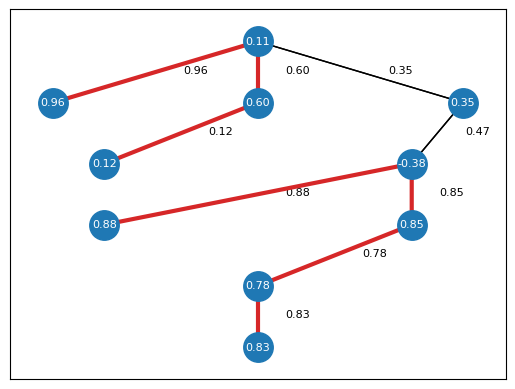

In [10]:
layout = hierarchye_pos(tree, 0)
root_z = custom_draw(tree, layout, x_nudge=xn, y_nudge=yn)

In [11]:
root_z = '%.2f'%(root_z)

In [12]:
root_z

'0.11'

In [13]:
for k,(_,z,_,_) in util.path_cover(tree, root=0, return_tuples=True):
    print(f'Node {k} has Z = {z}')

Node 1 has Z = 0.9590359279544994
Node 4 has Z = 0.12315852103180192
Node 6 has Z = 0.8751909107901029
Node 9 has Z = 0.828142456394374
Node 8 has Z = 0.7783690644073848
Node 7 has Z = 0.8464764456620598
Node 5 has Z = -0.3782076988769555
Node 3 has Z = 0.35276692345759775
Node 2 has Z = 0.6038179456400965
Node 0 has Z = 0.008376777259643253


#### Algorithm Breakdown by Level

-0.057771210513025695

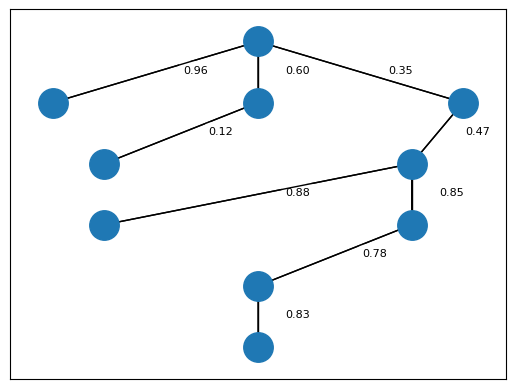

In [14]:
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, draw_path=False, label_subset=[])

0.10455902009110019

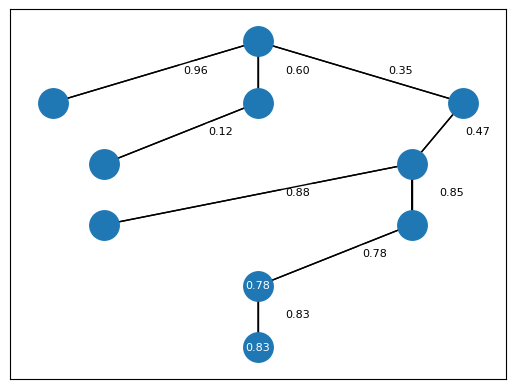

In [15]:
z_nodes = [8,9]
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, draw_path=False, label_subset=z_nodes)

-0.4361321548821072

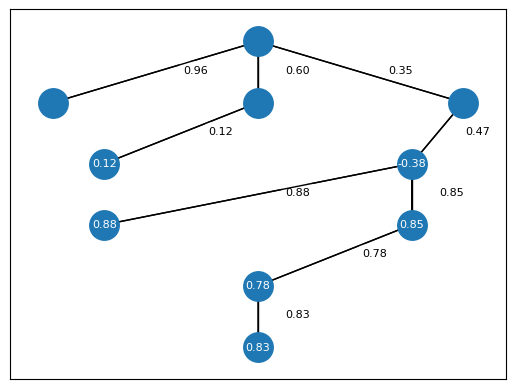

In [16]:
z_nodes += [4,5,6,7]
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, draw_path=False, label_subset=z_nodes)

-0.3296836636614735

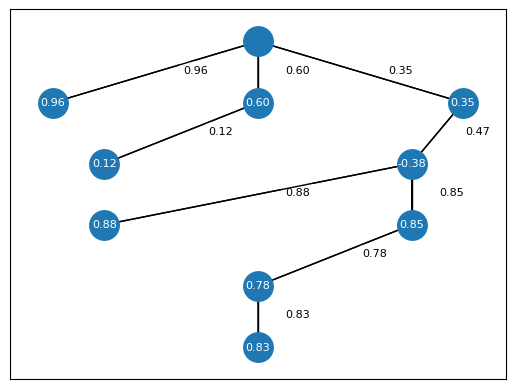

In [17]:
z_nodes += [1,2,3]
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, draw_path=False, label_subset=z_nodes)

{0: Text(1.0, 0, '0.11')}

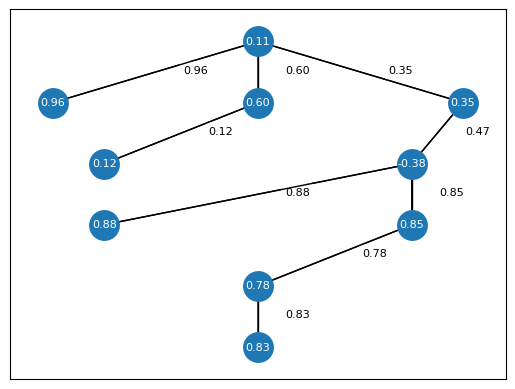

In [18]:
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, draw_path=False, label_subset=z_nodes)

nx.draw_networkx_labels(tree, {0:layout[0]}, labels={0:root_z}, font_color='w', font_size=label_font_size)

{0: Text(1.0, 0, '0.11')}

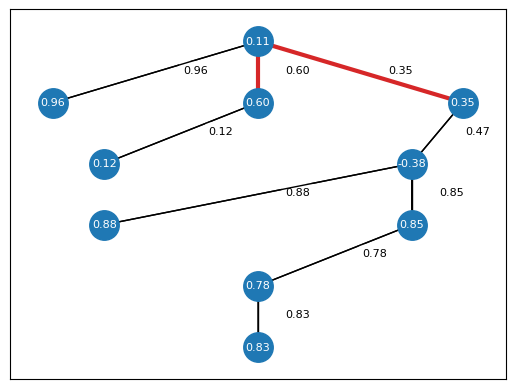

In [19]:
partial_path = [(0,2), (0,3)]
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, path_subset=partial_path, label_subset=z_nodes)
nx.draw_networkx_labels(tree, {0:layout[0]}, labels={0:root_z}, font_color='w', font_size=label_font_size)

{0: Text(1.0, 0, '0.11')}

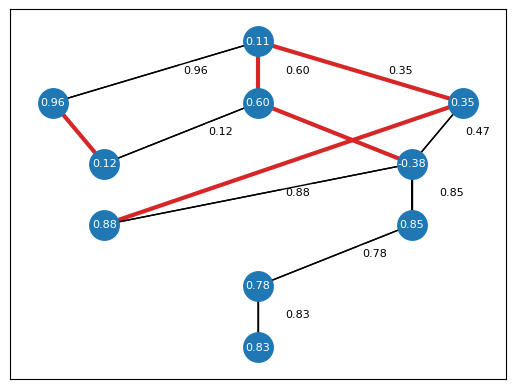

In [20]:
partial_path += [(1,4), (2,5), (3,6)]
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, path_subset=partial_path, label_subset=z_nodes)
nx.draw_networkx_labels(tree, {0:layout[0]}, labels={0:root_z}, font_color='w', font_size=label_font_size)

{0: Text(1.0, 0, '0.11')}

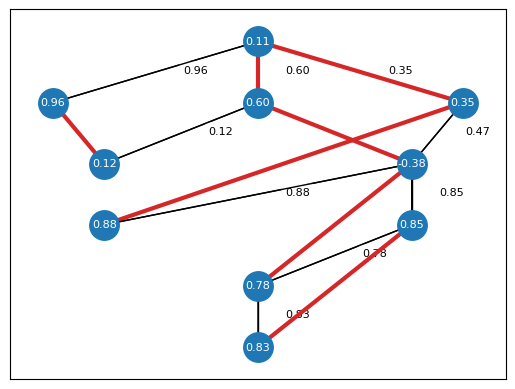

In [21]:
partial_path += [(5,8), (7,9)]
custom_draw(tree, layout, x_nudge=xn, y_nudge=yn, path_subset=partial_path, label_subset=z_nodes)
nx.draw_networkx_labels(tree, {0:layout[0]}, labels={0:root_z}, font_color='w', font_size=label_font_size)